# Reading and visualizing High Asia Dataset
- Original file: ICE.a00.2001.02.01-15.nc.gz
- Note:
    1. The file has to be unzipped in order to be read in by any libraries.
       *Note: Though zipping the netCDF file would make the file smaller, I think it is better to have it unzipped.*

In [1]:
# Import the necessary libraries
%matplotlib inline
import xarray as xr
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np
import requests

In [2]:
# Open the netCDF as xarray dataset
ds = xr.open_dataset('ICE.a00.2001.02.01-15.nc.gz')

In [3]:
# Examine the coords. There are no lat and lon to use for quick plotting in cartopy
ds.coords

Coordinates:
  * sector   (sector) float32 1.0 2.0 3.0
  * atmxh    (atmxh) timedelta64[ns] 0 days 03:00:00 0 days 06:00:00 ...
  * zuvlev   (zuvlev) float32 10.0 25.0 50.0 100.0
  * x        (x) float32 -2100.0 -2087.5 -2075.0 -2062.5 -2050.0 -2037.5 ...
  * blev     (blev) float32 0.999685 0.99937 0.99874
  * plev     (plev) float32 925.0 850.0 800.0 700.0 600.0 500.0 200.0
  * outlay   (outlay) float32 0.0 0.05 0.1 0.2 0.3 0.4 0.5 0.65 0.8 1.0 1.5 ...
  * atmlay   (atmlay) float32 0.999685 0.99937 0.99874
  * sollay   (sollay) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0
  * ztqlev   (ztqlev) float32 2.0 10.0 25.0 50.0 100.0
  * snolay   (snolay) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * time     (time) datetime64[ns] 2001-02-01T12:00:00 2001-02-02T12:00:00 ...
  * y        (y) float32 -1262.5 -1250.0 -1237.5 -1225.0 -1212.5 -1200.0 ...

In [4]:
# Examine the data variables
ds.data_vars

Data variables:
    VVz      (time, zuvlev, y, x) float32 -3.38498 -3.25918 -3.16204 -3.1575 ...
    MIN      (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    PRh      (time, atmxh, y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    VVp      (time, plev, y, x) float32 -4.70391 -4.55127 -4.44009 -4.41407 ...
    WW       (time, atmlay, y, x) float32 1.59956e-06 -7.61906e-06 ...
    VVh      (time, atmxh, y, x) float32 -3.81805 -3.63665 -3.48477 -3.42857 ...
    SAL      (y, x) float32 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 0.15 ...
    G21      (time, outlay, y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    G11      (time, outlay, y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    IWP      (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    RH       (time, atmlay, y, x) float32 54.825 54.9729 54.8331 54.3434 ...
    LHF      (time, y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    R0       (time, sector, y, x) float32 0.

In [5]:
# Looking at attribute of sample dataset 'Albedo'
ds.AL.attrs

OrderedDict([('units', u'-'), ('long_name', u'Albedo'), ('standard_name', u'Albedo'), ('actual_range', array([ 0.        ,  0.88624334], dtype=float32))])

In [6]:
# Looking at the coordinates of sample dataset 'Albedo'
ds.AL.coords

Coordinates:
  * x        (x) float32 -2100.0 -2087.5 -2075.0 -2062.5 -2050.0 -2037.5 ...
  * time     (time) datetime64[ns] 2001-02-01T12:00:00 2001-02-02T12:00:00 ...
  * y        (y) float32 -1262.5 -1250.0 -1237.5 -1225.0 -1212.5 -1200.0 ...

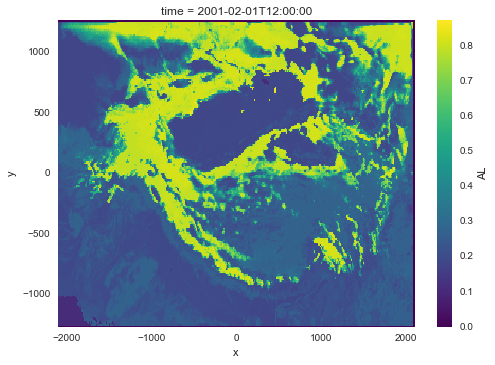

In [7]:
# Initial quick_plot for the first timestamp
ds.AL[0].plot()

Note: This plot is in cartesian coordinates, lat and lon is not in coords to be able to plot this on a map. From data variables there are LAT and LON. We will use this for plotting on a map by adding them to the dataset coordinates.

In [8]:
ds.coords['lat'] = ds.LAT

In [9]:
ds.coords['lon'] = ds.LON

In [10]:
# lat and lon has been added so now lets plot with cartopy for quick view
ds.coords

Coordinates:
  * sector   (sector) float32 1.0 2.0 3.0
  * atmxh    (atmxh) timedelta64[ns] 0 days 03:00:00 0 days 06:00:00 ...
  * zuvlev   (zuvlev) float32 10.0 25.0 50.0 100.0
  * x        (x) float32 -2100.0 -2087.5 -2075.0 -2062.5 -2050.0 -2037.5 ...
  * blev     (blev) float32 0.999685 0.99937 0.99874
  * plev     (plev) float32 925.0 850.0 800.0 700.0 600.0 500.0 200.0
  * outlay   (outlay) float32 0.0 0.05 0.1 0.2 0.3 0.4 0.5 0.65 0.8 1.0 1.5 ...
  * atmlay   (atmlay) float32 0.999685 0.99937 0.99874
  * sollay   (sollay) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0
  * ztqlev   (ztqlev) float32 2.0 10.0 25.0 50.0 100.0
  * snolay   (snolay) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * time     (time) datetime64[ns] 2001-02-01T12:00:00 2001-02-02T12:00:00 ...
  * y        (y) float32 -1262.5 -1250.0 -1237.5 -1225.0 -1212.5 -1200.0 ...
    lat      (y, x) float32 23.0336 23.0526 23.0714 23.0902 23.1088 23.1274 ...
    lon      (y, x) float32 64.7944 64.9104 65.0265 65.14

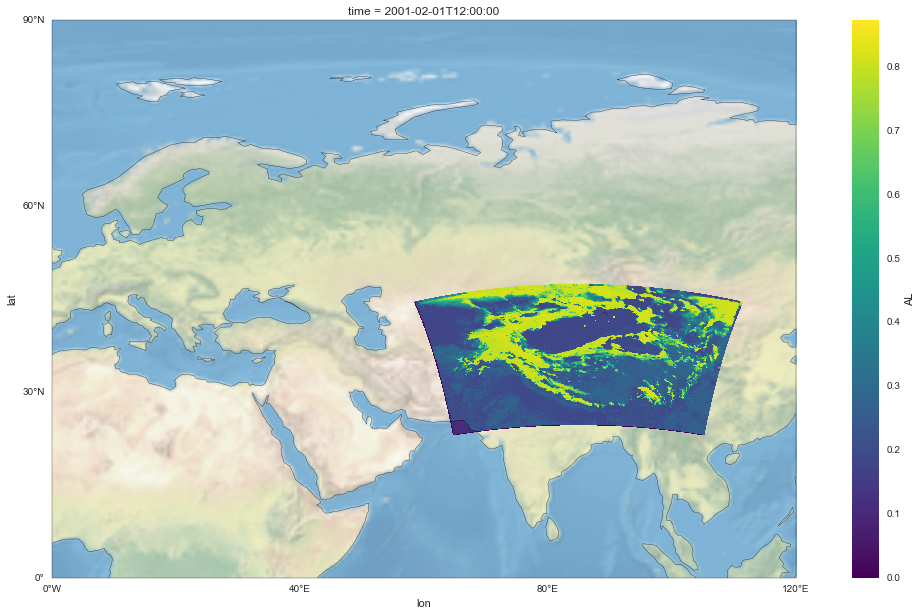

In [11]:
# Set up cartopy axes
plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.stock_img()
# ax.gridlines()
ax.coastlines()
ax.set_ylim([0,90])
ax.set_xlim([0,120])
ax.set_xticks([0, 40, 80, 120], crs=ccrs.PlateCarree())
ax.set_yticks([0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the data of first timestamp only
ds.AL[0].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='lon', y='lat', add_colorbar=True)

This map is drawn with Cartopy with Plate Carree projection, EPSG:4326.

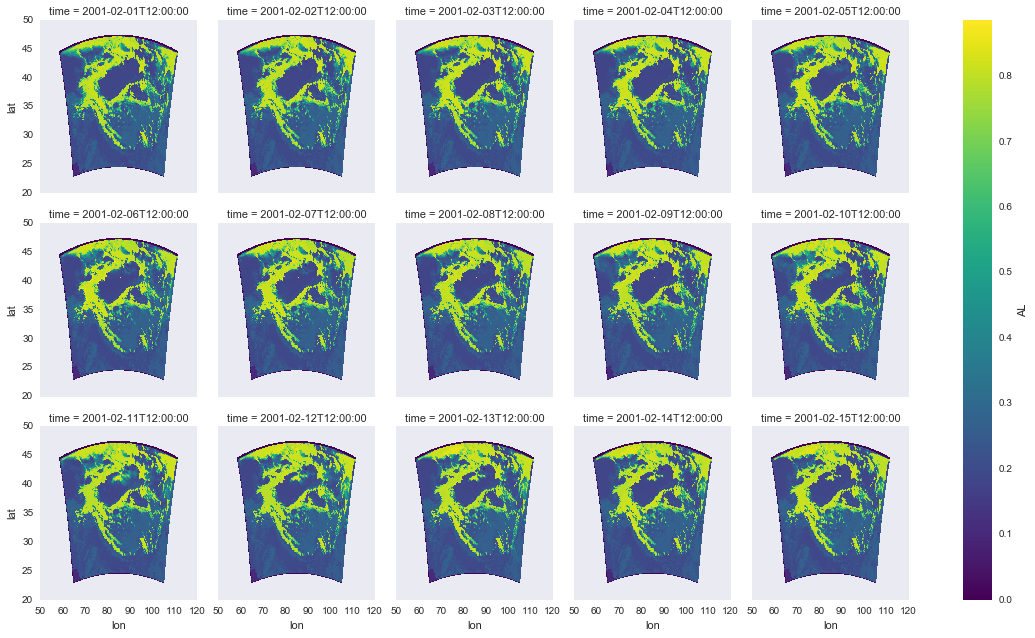

In [12]:
# Looking at all the timestamps
ds.AL.plot(x='lon', y='lat', col='time', col_wrap=5)